## CSIS 3290 – 001 – Lab 02
### Name- Arpit Mohanani
### Student ID- 300337709

### Load the python library

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seab
from scipy.stats import norm

### Read the data

In [25]:
df = pd.read_csv('Lab01_AMo37709.csv') #reads the csv file

In [26]:
df.head()

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,model_name
0,15999,48054,Gasoline,Ruby Red Metallic Tinted Clearcoat,Charcoal Black,RWD,Manual,V2,Mustang
1,31795,29050,Gasoline,Glacier White,Gray,RWD,Auto,V6,Model Unknown
2,13998,7,Gasoline,Ingot Silver,Charcoal Black,FWD,Auto,V4,Fiesta
3,19237,10,Gasoline,Oxford White,Ebony,FWD,Auto,V4,Fusion
4,38868,3,Gasoline,Oxford White,Charcoal,Rear Wheel Drive,Auto,V3,Transit-350


### Reduce the number of unique values in fuel_type

In [27]:
df.fuel_type.unique()

array([' Gasoline', ' Electric', ' E85 Flex Fuel', ' Diesel', ' Hybrid',
       ' Unknown'], dtype=object)

In [28]:
df.fuel_type.value_counts()

 Gasoline         535
 E85 Flex Fuel     94
 Diesel            38
 Hybrid            18
 Unknown            2
 Electric           1
Name: fuel_type, dtype: int64

In [29]:
df.loc[df['fuel_type'].str.contains('(?i)E85 Flex Fuel'), 'fuel_type'] = 'Gas'

In [30]:
df.fuel_type.value_counts()

 Gasoline    535
Gas           94
 Diesel       38
 Hybrid       18
 Unknown       2
 Electric      1
Name: fuel_type, dtype: int64

In [31]:
df['fuel_type'] = df['fuel_type'].str.strip()

In [32]:
df.fuel_type.value_counts()

Gasoline    535
Gas          94
Diesel       38
Hybrid       18
Unknown       2
Electric      1
Name: fuel_type, dtype: int64

In [33]:
df.drop(df.loc[df.fuel_type.str.contains('(?i)Unknown')].index, inplace=True)

In [34]:
df.drop(df.loc[df.fuel_type.str.contains('(?i)Electric')].index, inplace=True)

In [35]:
df.fuel_type.value_counts()

Gasoline    535
Gas          94
Diesel       38
Hybrid       18
Name: fuel_type, dtype: int64

### Reduce the number of unique values in exterior_color

In [36]:
df.exterior_color.unique()

array([' Ruby Red Metallic Tinted Clearcoat', ' Glacier White',
       ' Ingot Silver', ' Oxford White', ' Silver Birch Metallic',
       ' Diamond White - White', ' Ingot Silver Metallic',
       ' Magnetic Metallic', ' Stone Gray', ' White',
       ' Tuxedo Black Metallic', ' Black', ' Magnetic', ' Shadow Black',
       ' Blue', ' White Platinum Metallic Tri-Coat',
       ' Deep Impact Blue Metallic', ' Oxford White - White',
       ' Magma Red', ' Agate Black Metallic', ' Lightning Blue',
       ' Blue Metallic', ' Baltic Sea Green Metallic',
       ' Burgundy Velvet Metallic Tinted Clearcoat',
       ' Ruby Red Tinted Clearcoat', ' Silver', ' Alloy Metallic',
       ' Bordeaux Reserve Red Metallic', ' Gray', ' Ruby Red',
       ' Frozen White Metallic', ' Frozen White', ' Dark Blue Pearl',
       ' Redfire Metallic', ' Dark Blue', ' Agate', ' Chili Pepper Red',
       ' Race Red', ' Hot Pepper Red Tinted Clearcoat',
       ' Lightning Blue Metallic', ' Orange Metallic', ' Red',
   

In [37]:
# Giving generic names to exterior color
df.loc[df['exterior_color'].str.contains('(?i)black'), 'exterior_color'] = 'black'
df.loc[df['exterior_color'].str.contains('(?i)white'), 'exterior_color'] = 'white'
df.loc[df['exterior_color'].str.contains('(?i)magnetic'), 'exterior_color'] = 'magnetic'
df.loc[df['exterior_color'].str.contains('(?i)red|crimson'), 'exterior_color'] = 'red'
df.loc[df['exterior_color'].str.contains('(?i)blue'), 'exterior_color'] = 'blue'
df.loc[df['exterior_color'].str.contains('(?i)gray|charcoal|slate|agate'), 'exterior_color'] = 'gray'
df.loc[df['exterior_color'].str.contains('(?i)silver|tectonic'), 'exterior_color'] = 'silver'
df.loc[df['exterior_color'].str.contains('(?i)green|ebony|guard'), 'exterior_color'] = 'green'
df.loc[df['exterior_color'].str.contains('(?i)burgundy|tectonic'), 'exterior_color'] = 'burgundy'
df.loc[df['exterior_color'].str.contains('(?i)orange'), 'exterior_color'] = 'orange'
df.loc[df['exterior_color'].str.contains('(?i)yellow'), 'exterior_color'] = 'yellow'
df.loc[df['exterior_color'].str.contains('(?i)brown|tan'), 'exterior_color'] = 'brown'
df.loc[df['exterior_color'].str.contains('(?i)metallic'), 'exterior_color'] = 'metallic'
df.loc[df['exterior_color'].str.contains('(?i)Bordeaux Reserve|Rich Copper|Cinnamon|Special Paint|Smoke|Bronze Fire|Champagne|Lead Foot'), 'exterior_color'] = 'other'

In [38]:
df.exterior_color.value_counts()

white       177
black       139
red          91
silver       80
magnetic     65
blue         60
gray         24
metallic     15
green        12
other         8
burgundy      7
orange        3
yellow        2
brown         2
Name: exterior_color, dtype: int64

### Reduce the number of unique values in drivetrain

In [39]:
df.drivetrain.unique()

array([' RWD', ' FWD', ' Rear Wheel Drive', ' AWD', ' Four Wheel Drive',
       ' 4WD', ' Front', ' Front Wheel Drive', ' 2WD', ' 4X4',
       ' ALL WHEEL', ' Automatic 5-Speed', ' Automatic 6-Speed', ' 4X2',
       ' 4WD/AWD', ' All Wheel Drive'], dtype=object)

In [40]:
df.loc[df['drivetrain'].str.contains('(?i)4WD|4x4|all|AWD|four'), 'drivetrain'] = 'AWD'
df.loc[df['drivetrain'].str.contains('(?i)FWD|front'), 'drivetrain'] = 'FWD'
df.loc[df['drivetrain'].str.contains('(?i)RWD|rear'), 'drivetrain'] = 'RWD'
df.loc[df['drivetrain'].str.contains('(?i)2WD|4x2|automatic'), 'drivetrain'] = 'FWD'

### EDA

In [41]:
df.dtypes

price              int64
miles              int64
fuel_type         object
exterior_color    object
interior_color    object
drivetrain        object
transmission      object
engine            object
model_name        object
dtype: object

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

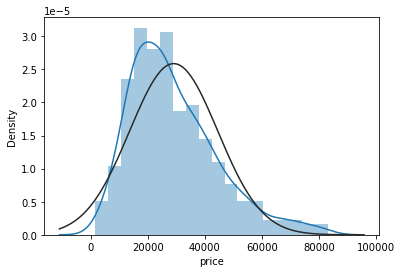

In [42]:
seab.distplot(df.price, fit=norm) # Univariate plots

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='miles', ylabel='Density'>

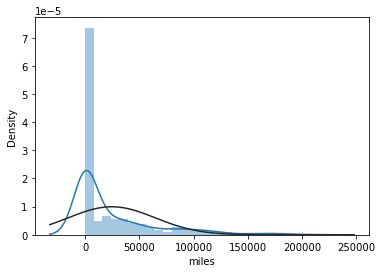

In [43]:
seab.distplot(df.miles, fit=norm) # Univariate plots

Text(0, 0.5, 'Price')

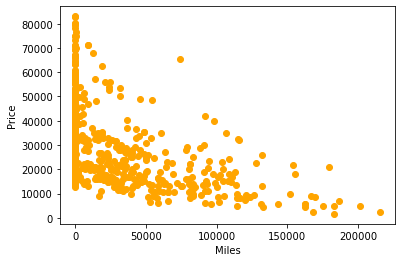

In [44]:
plt.scatter(df.miles, df.price,color="orange") # Multivariante plot
plt.xlabel('Miles')
plt.ylabel('Price')

<AxesSubplot:>

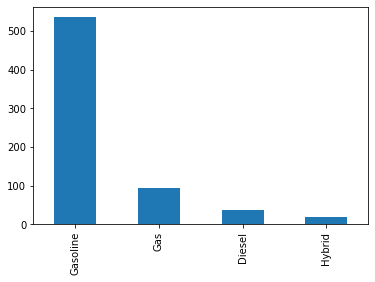

In [45]:
df['fuel_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

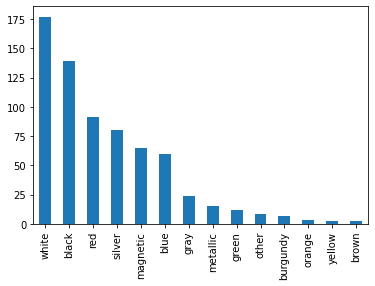

In [46]:
df['exterior_color'].value_counts().plot(kind='bar')

<AxesSubplot:>

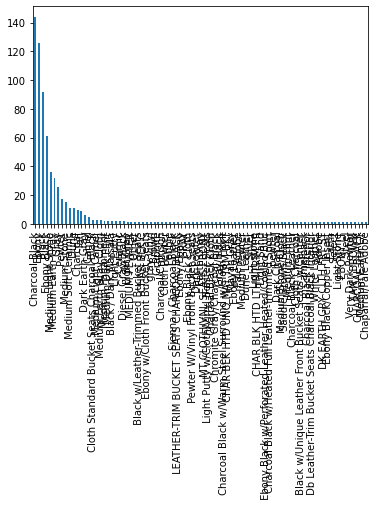

In [47]:
df['interior_color'].value_counts().plot(kind='bar')

<AxesSubplot:>

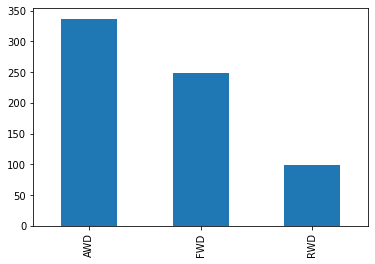

In [48]:
df['drivetrain'].value_counts().plot(kind='bar')

<AxesSubplot:>

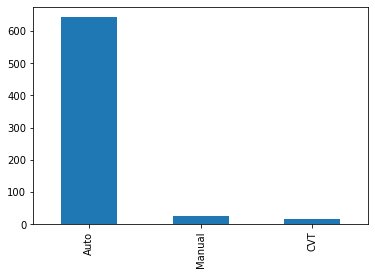

In [49]:
df['transmission'].value_counts().plot(kind='bar')

<AxesSubplot:>

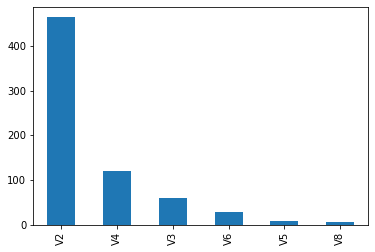

In [50]:
df['engine'].value_counts().plot(kind='bar')

<AxesSubplot:>

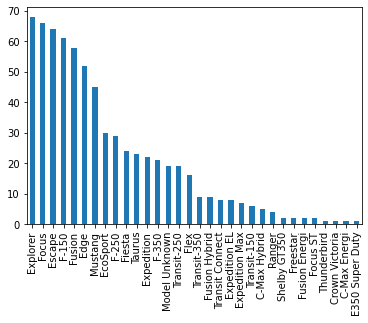

In [51]:
df['model_name'].value_counts().plot(kind='bar')

### Drop unneeded columns

In [52]:
df.model_name.value_counts()

Explorer           68
Focus              66
Escape             64
F-150              61
Fusion             58
Edge               52
Mustang            45
EcoSport           30
F-250              29
Fiesta             24
Taurus             23
Expedition         22
F-350              21
Model Unknown      19
Transit-250        19
Flex               16
Transit-350         9
Fusion Hybrid       9
Transit Connect     8
Expedition EL       8
Expedition Max      7
Transit-150         6
C-Max Hybrid        5
Ranger              4
Shelby GT350        2
Freestar            2
Fusion Energi       2
Focus ST            2
Thunderbird         1
Crown Victoria      1
C-Max Energi        1
E350 Super Duty     1
Name: model_name, dtype: int64

In [53]:
df.interior_color.value_counts()

 Charcoal Black          144
 Ebony                   126
 Black                    92
 Ebony Black              61
 Medium Light Stone       36
                        ... 
 Very Dark Pewter          1
 TAN / BROWN               1
 CHARCOAL BLACK            1
 Medium Earth Gr           1
 Chaparral/Pale Adobe      1
Name: interior_color, Length: 87, dtype: int64

In [54]:
df.drop("interior_color",axis="columns",inplace=True)
df.drop("model_name",axis="columns",inplace=True)

### Transforming categorical data

In [55]:
trans = pd.get_dummies(df['transmission'], drop_first=True, prefix='transmission') # creates dummy columns
df = df.join(trans)

In [56]:
trans = pd.get_dummies(df['engine'], drop_first=True, prefix='eng')# creates dummy columns
df = df.join(trans)

In [57]:
trans = pd.get_dummies(df['fuel_type'], drop_first=True, prefix='fuel')# creates dummy columns
df = df.join(trans)

In [58]:
trans = pd.get_dummies(df['drivetrain'], drop_first=True, prefix='drive') # creates dummy columns
df = df.join(trans)

In [59]:
trans = pd.get_dummies(df['exterior_color'], drop_first=True, prefix='color')# creates dummy columns
df = df.join(trans)

In [60]:
df.drop(['transmission','engine','fuel_type','drivetrain', 'exterior_color'], axis=1, inplace=True) #dropping undesired Columns

In [61]:
df.head()

,price,miles,transmission_CVT,transmission_Manual,eng_V3,eng_V4,eng_V5,eng_V6,eng_V8,fuel_Gas,...,color_gray,color_green,color_magnetic,color_metallic,color_orange,color_other,color_red,color_silver,color_white,color_yellow
0,15999,48054,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,31795,29050,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13998,7,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,19237,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,38868,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Save the Dataset

In [62]:
df.to_csv("Lab02_AMo37709.csv",index=False)